In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.shape

(7043, 21)

<Axes: >

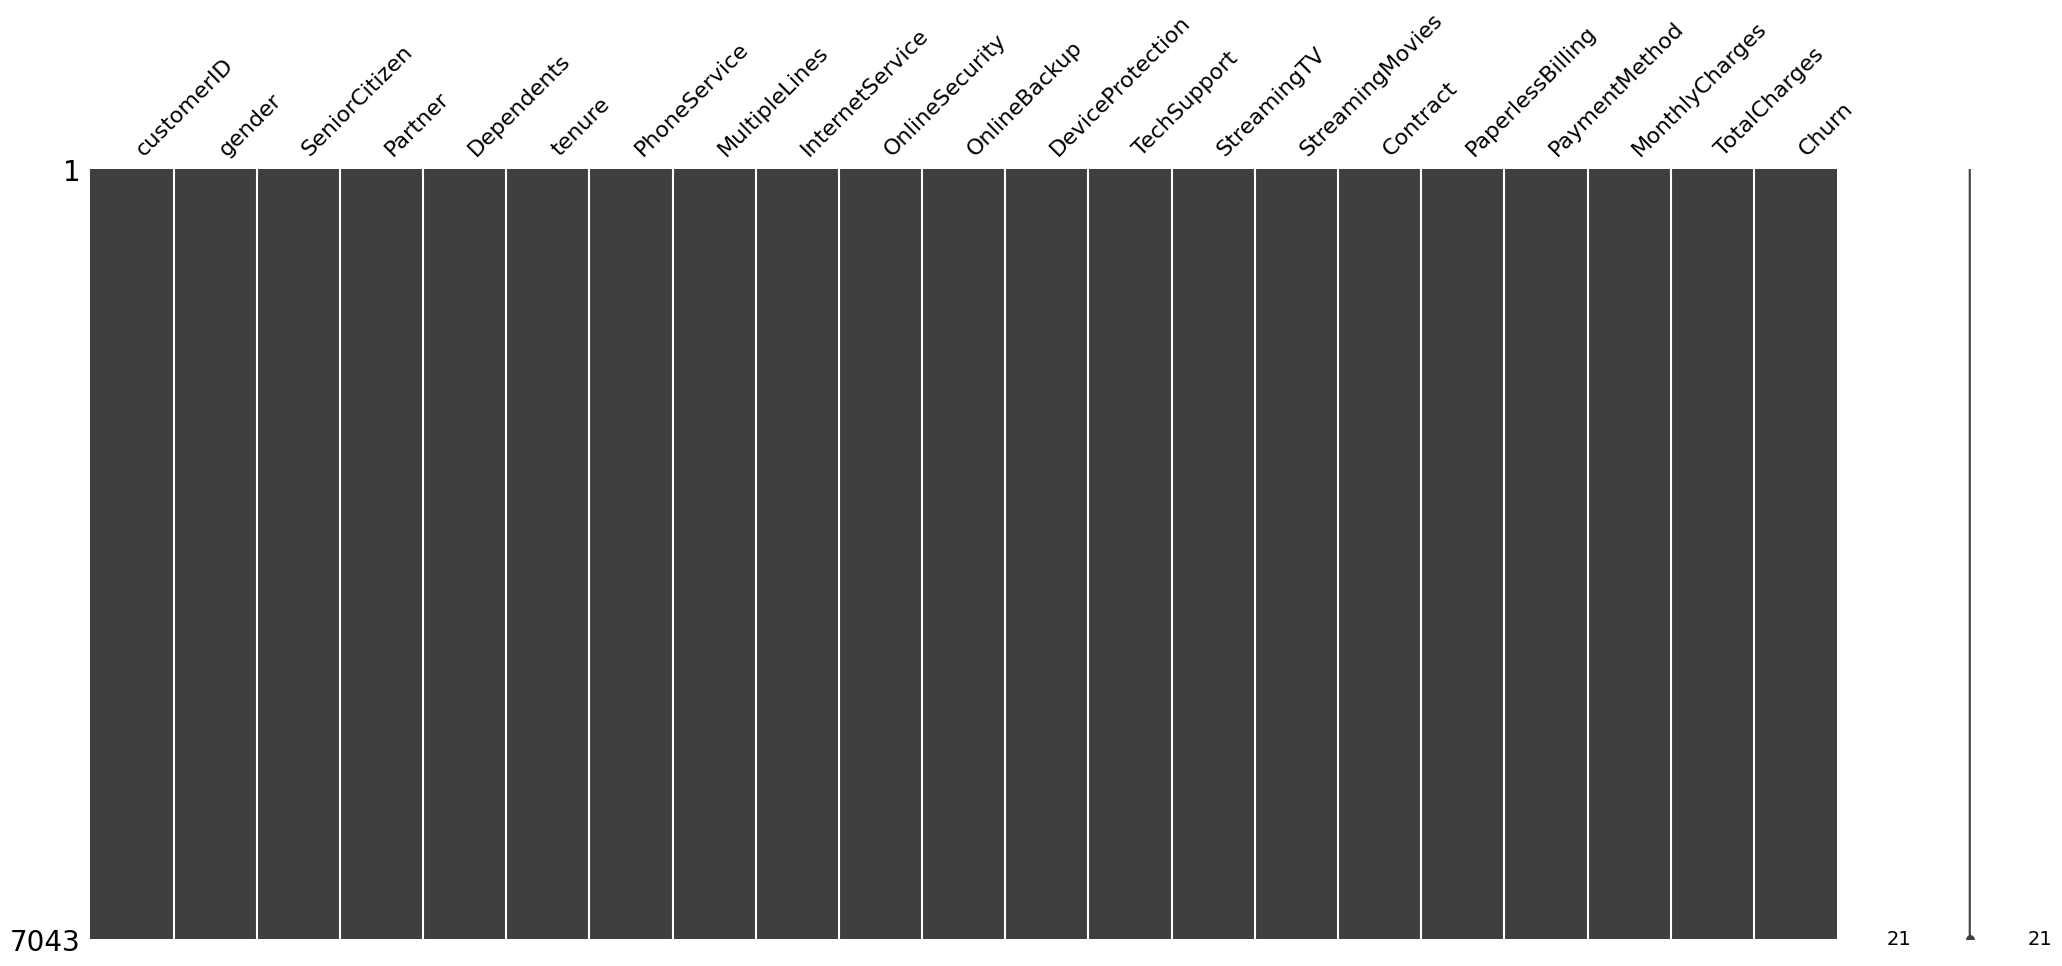

In [ ]:
msno.matrix(df)

#AS THE CHARTS SHOWS THERE ARE NO MISSING VALUES IN THE DATA
#THERE ARE 7043 ROWS AND 21 COLUMNS

EXPLORATORY DATA ANALYSIS

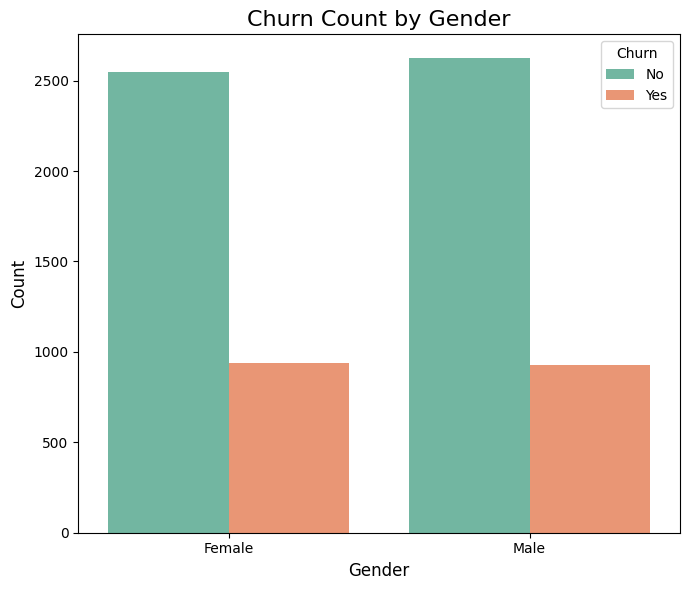

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')

plt.title('Churn Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


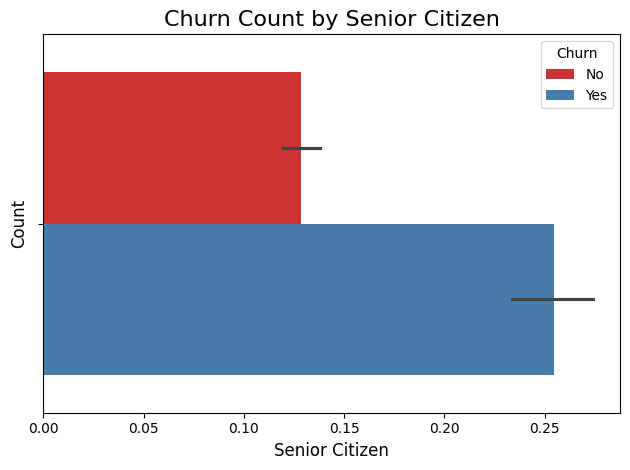

In [ ]:
sns.barplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set1')

plt.title('Churn Count by Senior Citizen', fontsize=16)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

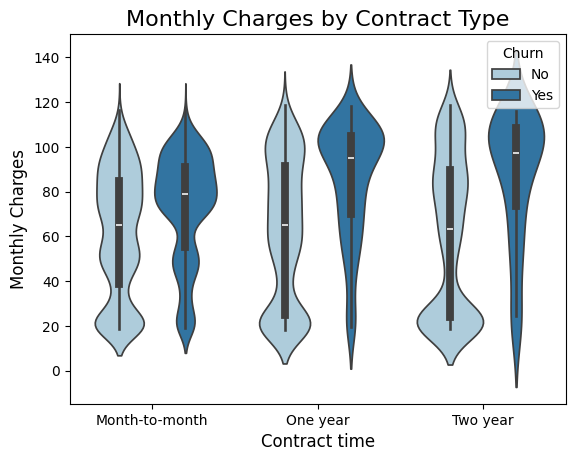

In [ ]:
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Paired')

plt.title('Monthly Charges by Contract Type', fontsize=16)
plt.xlabel('Contract time', fontsize=12)
plt.ylabel('Monthly Charges', fontsize=12)

plt.show()

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

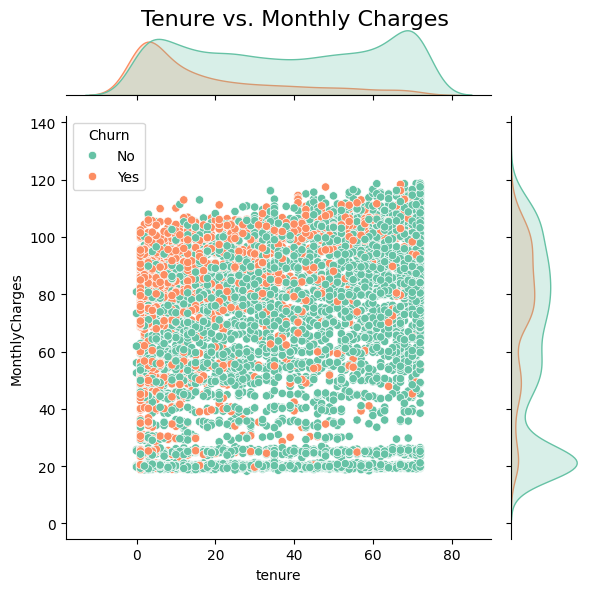

In [ ]:
g= sns.jointplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')


g.fig.suptitle('Tenure vs. Monthly Charges', fontsize=16)

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

plt.show()


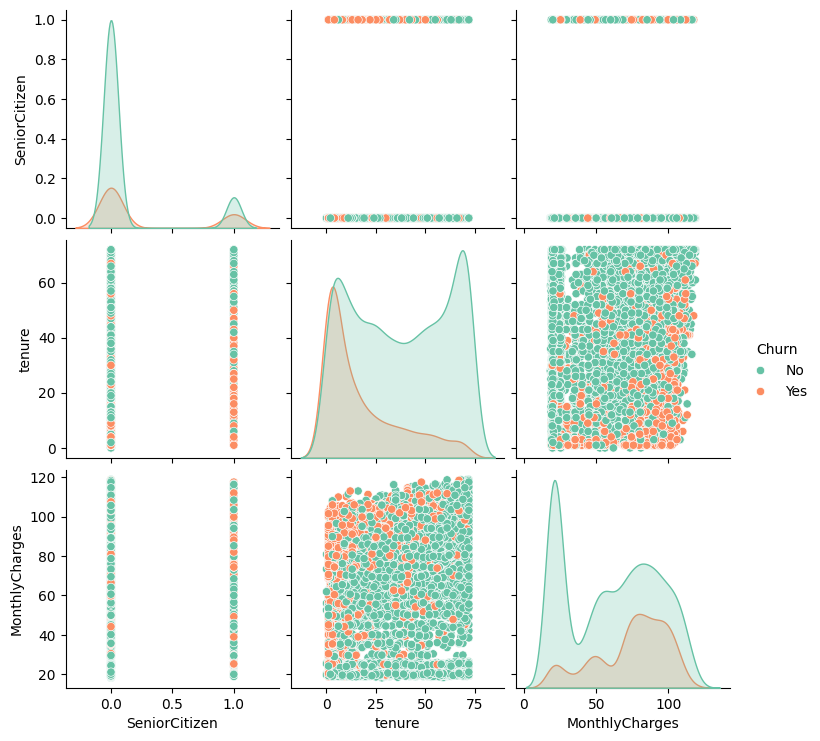

In [ ]:
sns.pairplot(df, hue='Churn', palette='Set2')


plt.show()

DATA PRE PROCESSING

In [ ]:
df=df.drop(columns=['customerID'])

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
ler=LabelEncoder()

In [44]:
df['gender']=ler.fit_transform(df['gender'])
df['Partner']=ler.fit_transform(df['Partner'])
df['Dependents']=ler.fit_transform(df['Dependents'])

df['PhoneService']=ler.fit_transform(df['PhoneService'])
df['MultipleLines']=ler.fit_transform(df['MultipleLines'])
df['InternetService']=ler.fit_transform(df['InternetService'])

df['OnlineSecurity']=ler.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=ler.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=ler.fit_transform(df['DeviceProtection'])

df['TechSupport']=ler.fit_transform(df['TechSupport'])
df['StreamingTV']=ler.fit_transform(df['StreamingTV'])
df['StreamingMovies']=ler.fit_transform(df['StreamingMovies'])

df['Contract']=ler.fit_transform(df['Contract'])
df['PaperlessBilling']=ler.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=ler.fit_transform(df['PaymentMethod'])

df['Churn']=ler.fit_transform(df['Churn'])
df['TotalCharges']=ler.fit_transform(df['TotalCharges'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0


In [ ]:
scaler.fit_transform(df[['tenure','MonthlyCharges']])

array([[0.01388889, 0.11542289],
       [0.47222222, 0.38507463],
       [0.02777778, 0.35422886],
       ...,
       [0.15277778, 0.11293532],
       [0.05555556, 0.55870647],
       [0.91666667, 0.86965174]])

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
20.20,11
19.75,9
20.05,8
19.90,8
19.65,8
...,...
6849.40,1
692.35,1
130.15,1


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [47]:
y=df[['Churn']]

In [48]:
df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


In [49]:
from imblearn.over_sampling import RandomOverSampler


In [50]:
ros=RandomOverSampler()

In [51]:
X,y=ros.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [52]:
y[['Churn']].value_counts()

,count
Churn,
0,5174
1,5174


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
param_grid_knn={'n_neighbors':[3,5,7,10],
                'weights':['uniform','distance'],
                'metric':['euclidean','manhattan']}

In [57]:
knn_grid=GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

In [58]:
knn_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [60]:
knn_grid.best_score_

0.8009282463861556

In [61]:
y_pred=knn_grid.predict(X_test)

In [62]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [63]:
accuracy_score(y_test,y_pred)

0.8144568998840356

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.70      0.79      2603\n           1       0.76      0.93      0.83      2571\n\n    accuracy                           0.81      5174\n   macro avg       0.83      0.82      0.81      5174\nweighted avg       0.83      0.81      0.81      5174\n'

In [66]:
confusion_matrix(y_test,y_pred)

array([[1835,  768],
       [ 192, 2379]])

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
Dtc=DecisionTreeClassifier()

In [69]:
Dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred=Dtc.predict(X_test)

In [71]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [72]:
Dtc_accuracy_score=accuracy_score(y_test,y_pred)

In [73]:
Dtc_accuracy_score

0.8134905295709316

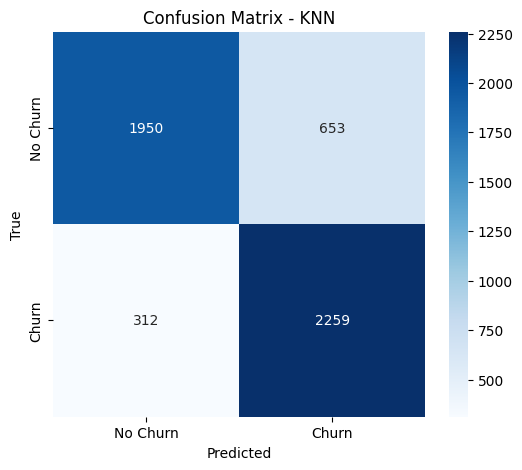

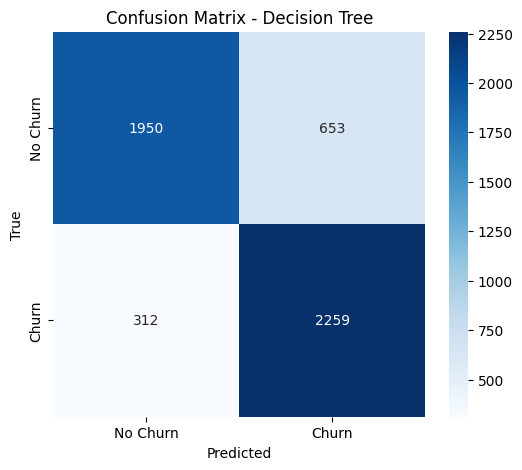

In [74]:
knn_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True,fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Dtc_cm = confusion_matrix(y_test, Dtc.predict(X_test))
plt.figure(figsize=(6, 5))
sns.heatmap(Dtc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
